In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("f051 - Sheet1.csv")

In [82]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [83]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,177,377,0
1,109,306,1
2,115,101,2
3,135,34,3
4,61,288,4


In [84]:
len(main_df)

36835

In [85]:
len(main_df)

36835

In [86]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 75.04780779150265
Average2: 56.97160309488258


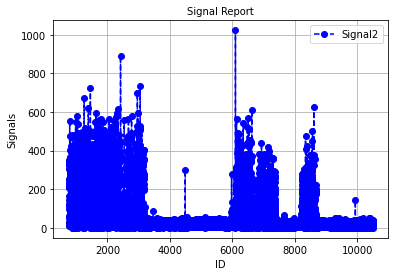

In [87]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [88]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [89]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [90]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,177,377
1,109,306
2,115,101
3,135,34
4,61,288


In [91]:
len(main_df)

9375

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [92]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [93]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [94]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [95]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[231.33553194925761, 232.33108405962568, 233.0322669356222, 233.07145859764603, 233.0037180396932, 234.04727800648737, 234.0403891282774, 234.01863585008286, 231.91049121553098, 234.55688112115453, 236.1112535737573, 235.609903734898, 235.64545560791768, 235.65365912462198, 236.56486600693054, 235.1849994307019, 235.35115418327794, 235.37841872185308, 237.32277936236562, 235.66840885125288, 235.81949500539378, 235.8421705543025, 237.74801291926462, 236.6624324895518, 236.58704065837298, 236.68756906012953, 239.99278064008152, 238.08205344192368, 238.1987778180457, 238.21755661175536, 240.8803151011069, 239.44836336165997, 239.61401671302036, 239.63651172976688, 241.62123981432543, 239.6818077868181, 239.5443312437513, 239.72749681100984, 241.89698165256283, 241.48694897253594, 241.30623807676287

In [96]:
print(rms_values2) 
print(len(rms_values2))  

[15.209718338919284, 15.24241070367892, 15.265394424502178, 15.266678047225795, 15.264459310427382, 15.298603792715443, 15.298378643773901, 15.297667660466509, 15.228607658467368, 15.315249952944109, 15.365912064493838, 15.349589692721366, 15.350747721460271, 15.351014921646776, 15.380665330437775, 15.335742545788316, 15.341158827913814, 15.342047409712078, 15.405284137670607, 15.35149532948673, 15.356415434774933, 15.357153725684409, 15.419079509466984, 15.383836728513202, 15.381386174801444, 15.384653686714223, 15.491700379237958, 15.429907758697835, 15.433689702013764, 15.434298060221442, 15.520319426516547, 15.47411914655112, 15.479470815018852, 15.480197406033518, 15.544170605546165, 15.481660369185796, 15.477219751743247, 15.483135884277766, 15.553037698551458, 15.539850352321155, 15.534034829263222, 15.533692431301676, 15.556696837107026, 15.499518301907694, 15.501309963837803, 15.501844003716924, 15.538611514289858, 15.490212203561931, 15.495785801912774, 15.495697053974459]
50

In [97]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [98]:
df.to_csv("f051_50.csv")